In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv("data_clean.csv")

In [2]:
enc_m = df.pivot_table(columns="encounter", index="m", values="dam", aggfunc="count")
enc_m

encounter,crabmonsters,demon whale,harpy,kraken,merpeople,nessie,pirates,sharks,unknown,water elemental
m,,,,,,,,,,
1,89,24,139,164,224,85,471,287,184,147
2,72,27,106,159,226,79,526,286,174,178
3,93,27,143,174,198,75,448,288,216,149
4,89,37,139,171,230,79,443,292,175,172
5,97,36,132,171,223,85,437,277,209,168
6,77,26,124,160,204,74,473,262,216,171
7,95,25,134,182,219,67,458,285,196,163
8,103,23,117,152,229,97,445,275,202,174
9,81,30,126,177,260,100,440,272,176,138


<AxesSubplot:xlabel='m'>

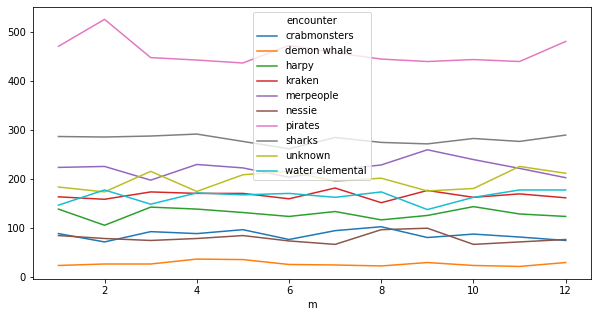

In [3]:
enc_m.plot(figsize=(10,5))

No *obvious* seasonality, at least.

In [4]:
enc_dir = df.pivot_table(columns="encounter", index="dir", values="dam", aggfunc="count")
enc_dir

encounter,crabmonsters,demon whale,harpy,kraken,merpeople,nessie,pirates,sharks,unknown,water elemental
dir,,,,,,,,,,
n,542,164,802,986,1324,464,2777,1683,1158,977
s,499,167,755,1019,1354,493,2729,1691,1209,1002


<AxesSubplot:xlabel='dir'>

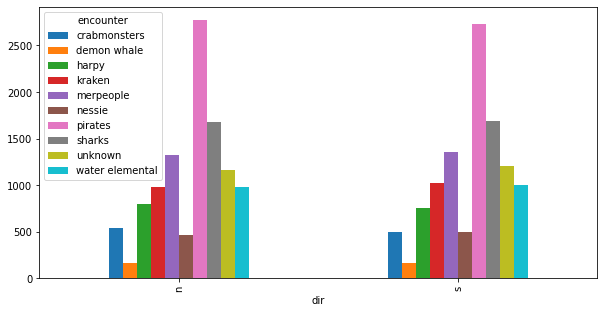

In [5]:
enc_dir.plot.bar(figsize=(10,5))

No obvious directionality, either.

In [6]:
enc_y = df.pivot_table(columns="encounter", index="y", values="dam", aggfunc="count")
enc_y

encounter,crabmonsters,demon whale,harpy,kraken,merpeople,nessie,pirates,sharks,unknown,water elemental
y,,,,,,,,,,
1396,88,37,130,186,237,94,643,304,249,183
1397,96,32,132,175,251,99,625,324,241,206
1398,97,23,135,180,259,92,675,321,232,169
1399,101,35,137,192,236,89,645,313,205,202
1400,108,38,159,187,245,82,641,315,236,198
1401,122,26,172,218,280,93,472,347,224,205
1402,113,33,169,221,285,108,419,378,243,203
1403,113,42,166,210,274,99,486,358,250,195
1404,107,24,172,234,294,92,445,367,254,214


<AxesSubplot:xlabel='y'>

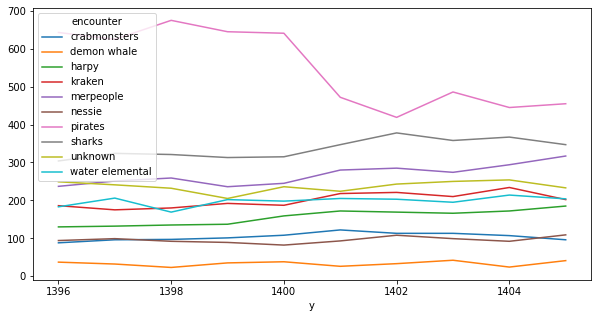

In [7]:
enc_y.plot(figsize=(10,5))

Oh, look at that. Pirate attacks seem to be down recently. Am I imagining it? Let's enhance the resolution.

In [8]:
enc_freq = df.pivot_table(columns="encounter", index=["y", "m"], values="dam", aggfunc="count")
enc_freq

encounter  crabmonsters  demon whale  harpy  kraken  merpeople  nessie  \
y    m                                                                   
1396 1              9.0          3.0   13.0    20.0       20.0    10.0   
     2              9.0          1.0   10.0    12.0       13.0     6.0   
     3             11.0          2.0   10.0    16.0       12.0    12.0   
     4              6.0          2.0   12.0    16.0       21.0     7.0   
     5              9.0          5.0   10.0    20.0       19.0    11.0   
...                 ...          ...    ...     ...        ...     ...   
1405 8             13.0          3.0   12.0    12.0       35.0    10.0   
     9              5.0          8.0   21.0    20.0       33.0     7.0   
     10            10.0          1.0   10.0    17.0       26.0     9.0   
     11             7.0          1.0   21.0    19.0       26.0     6.0   
     12             4.0          5.0   19.0    15.0       19.0    10.0   

encounter  pirates  sharks  unknown  water elemental  
y    m                                                
1396 1        53.0    27.0     22.0             10.0  
     2        59.0    27.0     20.0             18.0  
     3        50.0    28.0     25.0              8.0  
     4        48.0    30.0     19.0             17.0  
     5        48.0    24.0     25.0             12.0  
...            ...     ...      ...              ...  
1405 8        38.0    23.0     17.0             18.0  
     9        38.0    27.0     16.0             14.0  
     10       42.0    31.0     22.0             13.0  
     11       38.0    29.0     17.0             15.0  
     12       48.0    26.0     19.0             19.0  

[120 rows x 10 columns]

<AxesSubplot:xlabel='y,m'>

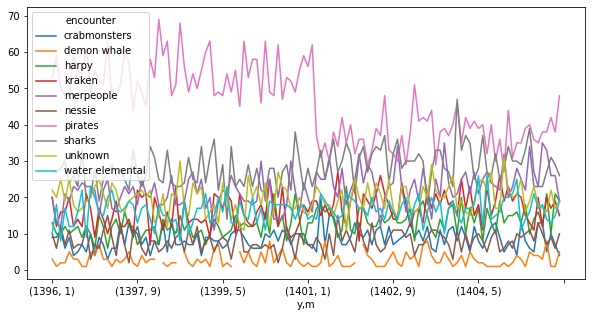

In [9]:
enc_freq.plot(figsize=(10,5))

Definitely not imagining it. The drop is sudden, and very consistent. When did it happen? Which encounter types took up the slack? Has encounter lethality also shifted with time?

<AxesSubplot:xlabel='y,m'>

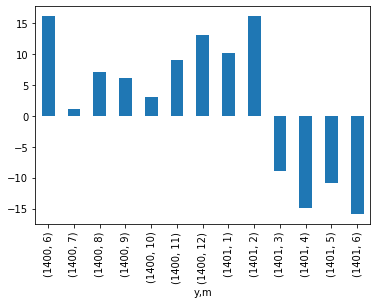

In [10]:
pirates_mean = enc_freq["pirates"].mean()
(enc_freq["pirates"].loc[(1400,6):(1401,6)] - pirates_mean).plot.bar()

The drop happened between feb and mar of 1401.

In [11]:
# attacks per type, before and after the drop
freq_earlyvlate = enc_freq.eval('late = y > 1401 or y == 1401 and m > 2')\
    .groupby("late")\
    .sum()
freq_earlyvlate

encounter,crabmonsters,demon whale,harpy,kraken,merpeople,nessie,pirates,sharks,unknown,water elemental
late,,,,,,,,,,
False,504.0,168.0,719.0,955.0,1264.0,469.0,3347.0,1628.0,1196.0,987.0
True,537.0,163.0,838.0,1050.0,1414.0,488.0,2159.0,1746.0,1171.0,992.0


<AxesSubplot:xlabel='late'>

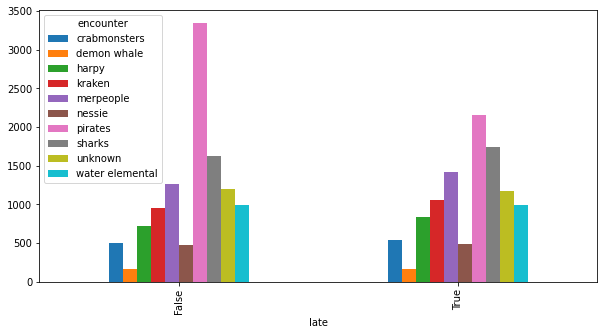

In [12]:
freq_earlyvlate.plot.bar(figsize=(10,5))

In [13]:
# total attacks
freq_earlyvlate.sum(axis=1)

late
False    11237.0
True     10558.0
dtype: float64

In [14]:
# attacks, as percent of total
freq_earlyvlate_per = freq_earlyvlate.apply(lambda r: r / freq_earlyvlate.sum(axis=1))
freq_earlyvlate_per

encounter,crabmonsters,demon whale,harpy,kraken,merpeople,nessie,pirates,sharks,unknown,water elemental
late,,,,,,,,,,
False,0.044852,0.014951,0.063985,0.084987,0.112486,0.041737,0.297855,0.144879,0.106434,0.087835
True,0.050862,0.015439,0.079371,0.099451,0.133927,0.046221,0.204489,0.165372,0.110911,0.093957


In [15]:
# percentile point variation
# +0.09 means an increase in share of 9 percentile points
freq_earlyvlate_perinc = (freq_earlyvlate_per.loc[True] - freq_earlyvlate_per.loc[False]).sort_values(ascending=False)
freq_earlyvlate_perinc

encounter
merpeople          0.021441
sharks             0.020494
harpy              0.015386
kraken             0.014464
water elemental    0.006122
crabmonsters       0.006010
nessie             0.004484
unknown            0.004477
demon whale        0.000488
pirates           -0.093366
dtype: float64

<AxesSubplot:xlabel='encounter'>

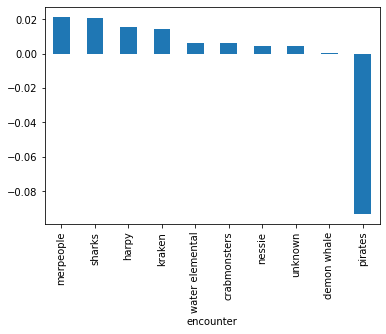

In [16]:
freq_earlyvlate_perinc.plot.bar()

Merpeople, sharks, harpies, and kraken are the biggest winners. Pirates are the only ones whose share went down.

We can't see encounter *lethality* per-se, but we can make some inferences given the damage distribution for each encounter type. In particular, encounters without long tails are likely 0% lethal, or easy to *make* 0% lethal.

array([[<AxesSubplot:title={'center':'crabmonsters'}>,
        <AxesSubplot:title={'center':'demon whale'}>,
        <AxesSubplot:title={'center':'harpy'}>],
       [<AxesSubplot:title={'center':'kraken'}>,
        <AxesSubplot:title={'center':'merpeople'}>,
        <AxesSubplot:title={'center':'nessie'}>],
       [<AxesSubplot:title={'center':'pirates'}>,
        <AxesSubplot:title={'center':'sharks'}>,
        <AxesSubplot:title={'center':'unknown'}>],
       [<AxesSubplot:title={'center':'water elemental'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

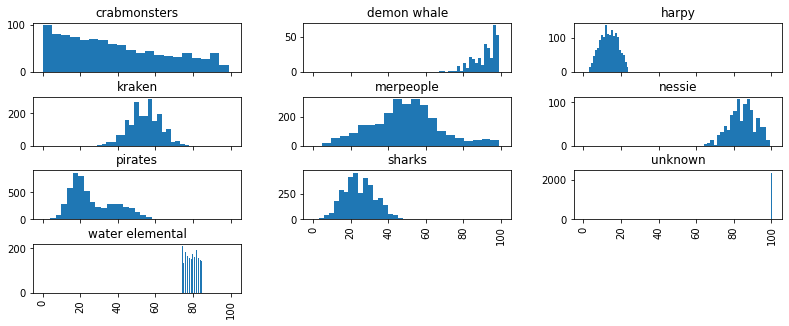

In [17]:
df.hist(column="dam", by="encounter",
        sharex=True, sharey=False, bins=20, figsize=(13,5))

Interesting.
- Harpies, kraken, pirates, sharks, and water elementals stand out as likely survivable without intervention.
- Crab monsters, demon whales and nessie are obvious killers
- Pirates have a double hump that makes me think that either:
    - there are two pirate populations out there
    - the pirate population changed over the years

My guess for each distribution shape:

encounter | distribution | generation
-|-|-
crabmonsters | geometric | roll to stop attack
demon whale | ? | ?
harpy | normal | roll n equal dice
kraken | normal | idem
merpeople | mix of normals | roll n equal dice, with some condition
nessie | normal | roll n equal dice
pirates | mix of normals | roll n equal dice, with some condition
sharks | normal | roll n equal dice
water elemental | uniform | roll 1 die

In [18]:
enc_earlyvlate = df.eval('late = y > 1401 or y == 1401 and m > 2')

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

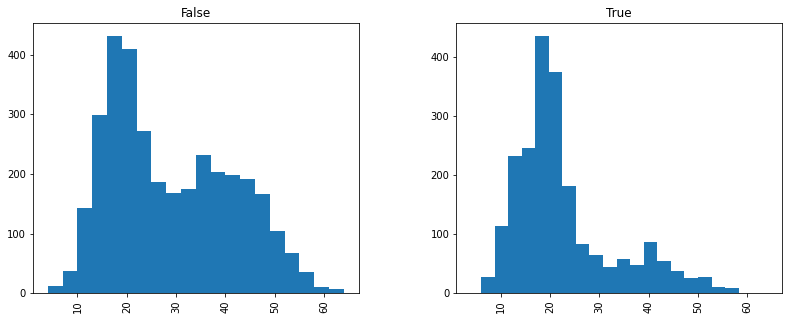

In [19]:
enc_earlyvlate.query('encounter == "pirates"').hist(column="dam", by="late",
        sharex=True, sharey=False, bins=20, figsize=(13,5))

Indeed, pirates after march 1401 are not just rarer, they are much less destructive. I'll venture a guess that a particularly vicious pirate gang messed with the wrong company/officer and got swatted.

Since we know of some encounters that basically never sink ships, we can infer we have complete data on them.

array([[<AxesSubplot:title={'center':'dam'}>]], dtype=object)

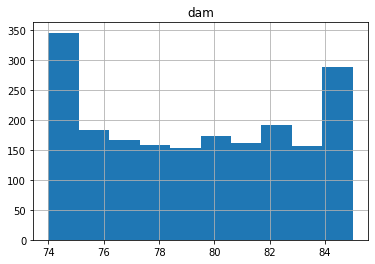

In [20]:
df.query('encounter == "water elemental"').hist(column="dam")

In [21]:
df.query('encounter == "water elemental"')["dam"]\
    .value_counts().sort_index()

74    210
75    136
76    183
77    166
78    158
79    154
80    173
81    162
82    192
83    156
84    146
85    143
Name: dam, dtype: int64

In [22]:
len(
    df.query('encounter == "water elemental"')["dam"]\
        .value_counts()
)

12

I'm learning my lesson this time. Am I looking at 73+d12 damage?

In [23]:
len(df.query('encounter == "water elemental"'))

1979

We have 1979 water elemental encounters. If we are rolling a d12, we expect `Binomial(n=1979, p=1/12)` encounters on each damage bin.

In [24]:
from scipy.stats import binom
print(
    binom.ppf(q=.05, n=1979, p=1/12),
    binom.ppf(q=.95, n=1979, p=1/12))

145.0 185.0


The ppf is the "percent point function". It is the inverse of the cumulative densiti function (cdf). Here I've asked for a 90% confidence interval: if we go through 1979 encounters, we are 90% confident that we'll see 145 to 185 encounters at 74 damage, 75 damage, 76 damage, etc.

In [25]:
df.query('encounter == "water elemental"')["dam"]\
    .value_counts().sort_index().apply(lambda x: 145 <= x <= 185)

74    False
75    False
76     True
77     True
78     True
79     True
80     True
81     True
82    False
83     True
84     True
85    False
Name: dam, dtype: bool

Really, the distributions for each damage bin are not independent, and properly should be modeled with a multinomial. The distortion is that lots of encounters falling on 74 damage make it likely that there are going to be other bins that are under stocked.

I still think that our results look too spiky for a d12, considering the large sample size.

---
I suspect that crabmonster damage is decided by repeatedly rolling a die. On success, you break free of the crabmonster. On failure, you lose a hull percent point.

But if so, what is the probability of success?

array([[<AxesSubplot:title={'center':'dam'}>]], dtype=object)

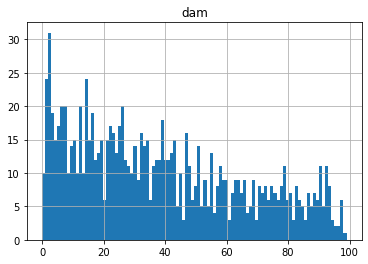

In [26]:
df.query('encounter == "crabmonsters"').hist("dam", bins=100)

Damage is all over the place. Let's say that we can neglect sunken ships, and look at mean damage.

In [27]:
df.query('encounter == "crabmonsters"')["dam"].mean()

38.30355427473583

In [28]:
len(df.query('encounter == "crabmonsters"'))

1041

38 mean damage means 1/38 chance of breaking out. Let's simulate that and see if the result looks broadly ok.

In [56]:
from random import random
def sim(p):
    dam = 0
    while dam < 100 and random() > p:
        dam += 1
    return dam

x = [sim(1/38) for i in range(0, 1041)]

<AxesSubplot:>

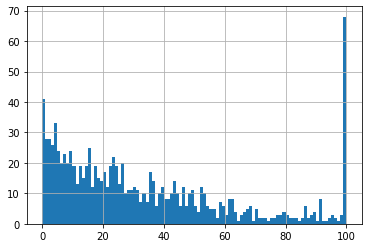

In [57]:
pd.Series(x).hist(bins=100)

About right, I'd say. Now let's take a closer look at the chance of success. The raw data was way too spiky to look at individual dropoffs. I could fit this model properly by reaching into the scikit-learn bag of holding, but we can do well enough by binning the data into large-ish blocks.

In [31]:
crab_dam = pd.cut(
    df.query('encounter == "crabmonsters"')["dam"],
    [0,20,40,60,80,100]
).value_counts()

<AxesSubplot:>

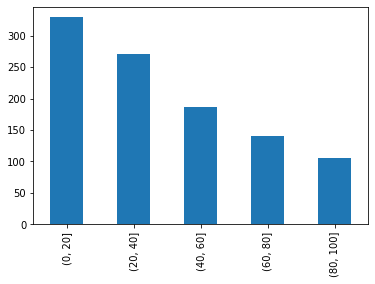

In [32]:
crab_dam.plot.bar()

In [33]:
crab_dam.rolling(window=2).apply(lambda x: x[1] / x[0])

(0, 20]           NaN
(20, 40]     0.820669
(40, 60]     0.688889
(60, 80]     0.752688
(80, 100]    0.757143
Name: dam, dtype: float64

In [34]:
crab_dam.rolling(window=2).apply(lambda x: x[1] / x[0]).mean()

0.7548471527709688

In [35]:
1-0.7548471527709688

0.2451528472290312

24.5% dropoff every 20 percentile points of damage. Spread evenly that should be 1- $\sqrt[20]{0.7548471527709688...}$

In [36]:
1 - 0.7548471527709688**(1/20)

0.013963591736272596

1.40%

In [37]:
1/0.013963591736272596

71.61481221212912

That... doesn't seem right

In [52]:
x = [sim(0.013963591736272596) for i in range(0, 1041)]

<AxesSubplot:>

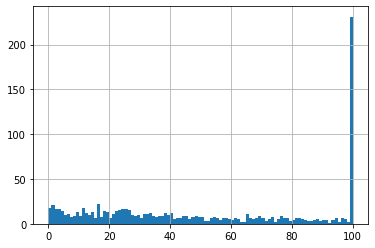

In [53]:
pd.Series(x).hist(bins=100)

I just redid the numbers on a spreadsheet, and it does add up. 1.4% dropoff per roll means 25% dropoff per block of 20.

<AxesSubplot:>

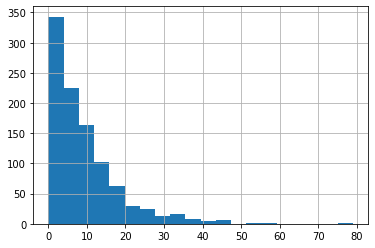

In [67]:
pd.Series([sim(1/10) for i in range(0, 1000)]).hist(bins=20)

<AxesSubplot:>

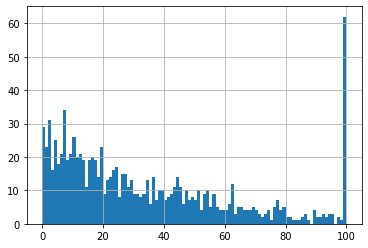

In [65]:
pd.Series([sim(1/40) for i in range(0, 1000)]).hist(bins=100)